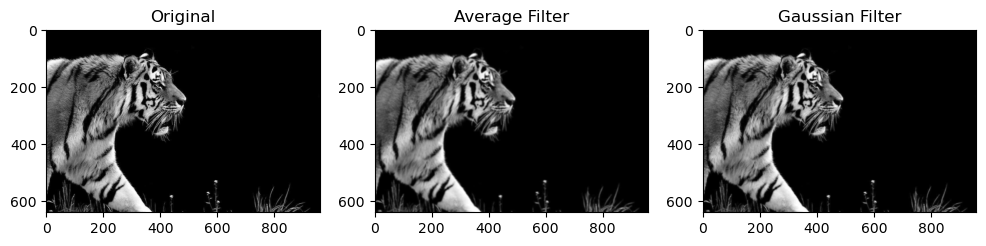

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\DELL\Music\tiger.jpg', cv2.IMREAD_GRAYSCALE)
avg_filter = cv2.blur(img, (5, 5))
gauss_filter = cv2.GaussianBlur(img, (5, 5), 0)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(avg_filter, cmap="gray")
plt.title("Average Filter")

plt.subplot(1, 3, 3)
plt.imshow(gauss_filter, cmap="gray")
plt.title("Gaussian Filter")

plt.show()


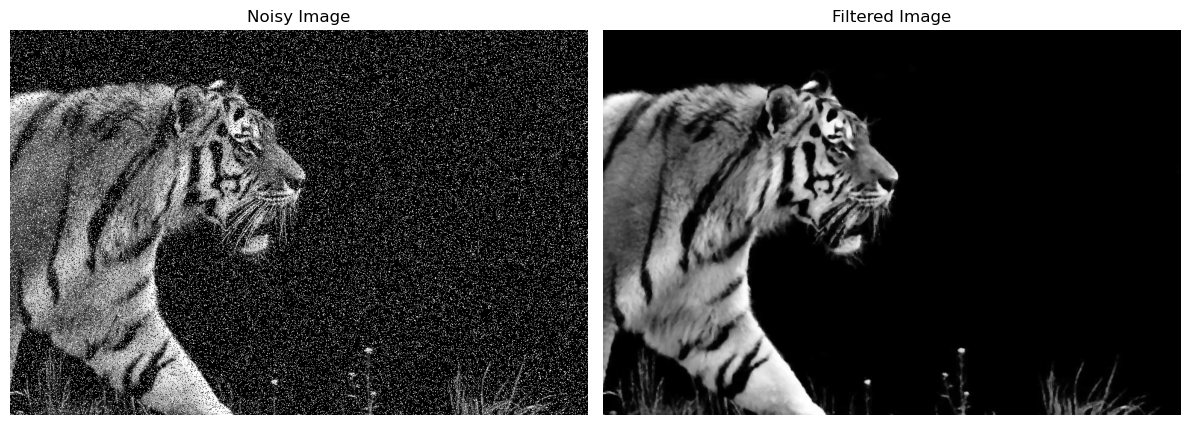

In [5]:
import cv2
import numpy as np
from skimage.util import random_noise
from skimage.filters.rank import median
from skimage.morphology import square
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\DELL\Music\tiger.jpg', cv2.IMREAD_GRAYSCALE)
noisy_img = random_noise(img, mode='s&p', amount=0.2)
noisy_img = (noisy_img * 255).astype(np.uint8)
filtered_img = median(noisy_img, square(5))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_30632\2996723104.py:9: RuntimeWarning: overflow encountered in scalar add
  vert = img[x + 1, y] + img[x - 1, y] - 2 * img[x, y]
C:\Users\DELL\AppData\Local\Temp\ipykernel_30632\2996723104.py:10: RuntimeWarning: overflow encountered in scalar add
  horz = img[x, y + 1] + img[x, y - 1] - 2 * img[x, y]


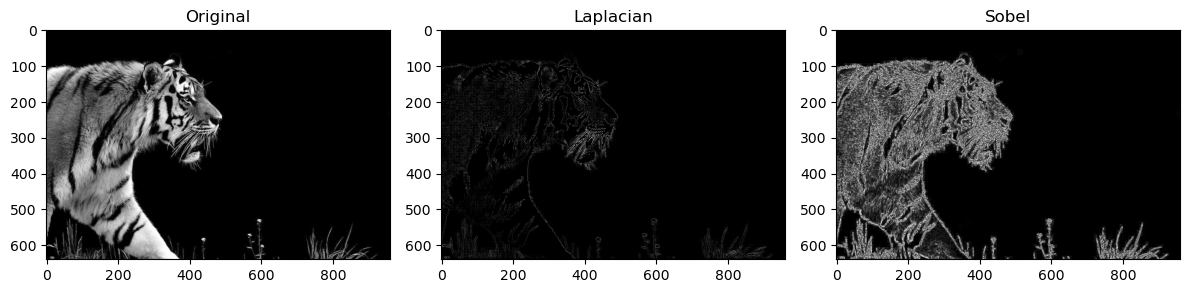

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian(img):
    lap = np.zeros_like(img, dtype=np.float32)
    for x in range(1, img.shape[0] - 1):
        for y in range(1, img.shape[1] - 1):
            vert = img[x + 1, y] + img[x - 1, y] - 2 * img[x, y]
            horz = img[x, y + 1] + img[x, y - 1] - 2 * img[x, y]
            lap[x, y] = vert + horz
    return np.clip(lap, 0, 255).astype(np.uint8)

img = cv2.imread(r'C:\Users\DELL\Music\tiger.jpg', cv2.IMREAD_GRAYSCALE)
lap_result = laplacian(img)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_result = cv2.magnitude(sobel_x, sobel_y).astype(np.uint8)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(lap_result, cmap='gray')
plt.title('Laplacian')

plt.subplot(1, 3, 3)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel')

plt.tight_layout()
plt.show()
